# Problem 1

In [1]:
import random
mass_Distribution = (0.1,0.5,0.1,0.1,0.1,0.1)
def roll(mass_Distribution):
    random_Roll = random.random() # in [0,1]
    sum = 0
    result = 1
    for mass in mass_Distribution:
        sum += mass
        if random_Roll < sum:
            return result
        result+=1

def dice(mass):
  step = 0;
  num_of_step = 0;
  for i in range(50000):
    for i in range(250):
      result = roll(mass)
      if result==1 or result==2: 
            step=max(0,step-1)
      elif result>=3 and result<=5: 
        step=step+1
      else: 
        res = roll(mass)
        step=step+res
    if step>60: num_of_step+=1
  return num_of_step

numstep = dice(mass_Distribution)
print("Probability = ",numstep/50000)

Probability =  0.53552


# Problem  2

### Data for LInear Regression

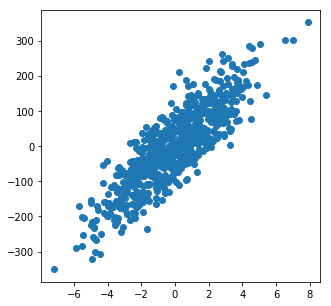

         X0        X1        X2        X3        X4           Y
0  0.105232 -1.309412 -1.482883  0.817862  0.238200 -140.911514
1 -0.575256 -0.768849 -0.513903 -1.169096  1.103504 -141.439286
2 -0.038477  0.555048 -0.736491  0.655924 -0.256650  -14.354605
3  0.124770  1.723696  0.504970  0.713016  0.325800  147.792735
4  0.679944 -0.493927  0.085843 -1.406460 -0.174823  -10.882571
           X0        X1        X2        X3        X4          Y
695 -0.203615 -0.480287 -0.003623  1.683367  1.240726  15.790688
696 -0.398148  0.031268 -0.091659 -0.092112  1.355443 -29.518529
697  2.337410 -1.037029  0.080720 -1.112906  0.095412  84.924144
698  0.269024 -0.795501  1.578865 -0.566440 -0.307691  81.478487
699 -1.664173  1.462214  1.431568 -0.428702 -0.637841  47.937540
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 6 columns):
X0    700 non-null float64
X1    700 non-null float64
X2    700 non-null float64
X3    700 non-null float64
X4    700 non-

In [44]:
from sklearn.datasets import make_regression
from matplotlib import pyplot
import pandas as pd
# generating dataset for regression
X_1, y_1 = make_regression(n_samples=700, n_features=5, noise=0.2)
# plotting the data we generated
data = {'X0': X_1[:,0],'X1':X_1[:,1],'X2':X_1[:,2],'X3':X_1[:,3],'X4':X_1[:,4],'Y': y_1}
pyplot.scatter(X_1[:,0]+X_1[:,1]+X_1[:,2]+X_1[:,3]+X_1[:,4],y_1)
pyplot.show()
df = pd.DataFrame(data)
print(df.head())
print(df.tail())
print(df.info())

### Data for Logistic Regression

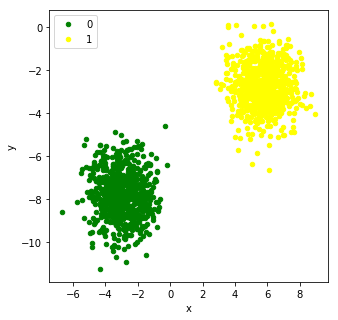

In [45]:
from matplotlib import pyplot
from sklearn.datasets import make_blobs
from pandas import DataFrame
# generate 2d classification dataset
X_2, y_2 = make_blobs(n_samples=1500, centers=2, n_features=2)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X_2[:,0], y=X_2[:,1], label=y_2))
colors = {0:'green', 1:'yellow'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

### Data for K-mean Clustering

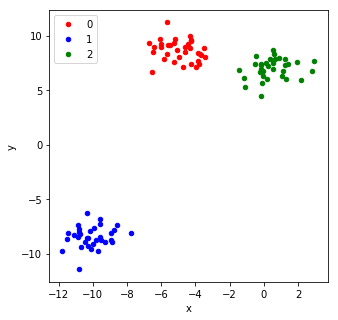

In [82]:
from matplotlib import pyplot
from pandas import DataFrame
from sklearn.datasets import make_blobs
# generate 2d classification dataset
X3, y3 = make_blobs(n_samples=100, centers=3, n_features=2)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X3[:,0], y=X3[:,1], label=y3))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

# Problem 3

## 3(a)

In [54]:
class LinearRegression():
    def __init__(self, X, y, alpha=0.03, n_iter=1000):

        self.alpha = alpha
        self.n_iter = n_iter
        self.n_samples = len(y)
        self.n_features = np.size(X, 1)
        self.X = np.hstack((np.ones(
            (self.n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))
        self.y = y[:, np.newaxis]
        self.params = np.zeros((self.n_features + 1, 1))
        self.coef_ = None
        self.intercept_ = None

    def fit(self):

        for i in range(self.n_iter):
            self.params = self.params - (self.alpha/self.n_samples) * \
            self.X.T @ (self.X @ self.params - self.y)

        self.intercept_ = self.params[0]
        self.coef_ = self.params[1:]

        return self

    def score(self, X=None, y=None):

        if X is None:
            X = self.X
        else:
            n_samples = np.size(X, 0)
            X = np.hstack((np.ones(
                (n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))

        if y is None:
            y = self.y
        else:
            y = y[:, np.newaxis]

        y_pred = X @ self.params
        score = 1 - (((y - y_pred)**2).sum() / ((y - y.mean())**2).sum())

        return score

    def predict(self, X):
        n_samples = np.size(X, 0)
        y = np.hstack((np.ones((n_samples, 1)), (X-np.mean(X, 0)) \
                            / np.std(X, 0))) @ self.params
        return y

    def get_params(self):

        return self.params

In [55]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
X = X_1
y = y_1

X_train, X_test, y_train, y_test = train_test_split(\
                X, y, test_size=0.25, random_state=50)
regressor = LinearRegression(X_train, y_train).fit()

train_accuracy = regressor.score()

test_accuracy = regressor.score(X_test, y_test)

pd.DataFrame([[train_accuracy],
              [test_accuracy]],
             ['Training Accuracy', 'Test Accuracy'])

,0
Training Accuracy,0.999997
Test Accuracy,0.997642


## 3(b)

In [56]:
import numpy as np

import pandas as pd

X = X_2 # slice dataset upto last column and store in vector X
Y = y_2 #store the last column in Y and it will be the class label

Y = Y.reshape(-1,1)# This will reshape Y as a column vector. conversally reshape(1,-1) will reshape an array as row vector

def sigmoid(z):
    return(1/(1+np.exp(-z)))

def cross_entropy_loss(y_pred,target):
    return -np.mean((target*np.log(y_pred)+(1-target)*np.log(1-y_pred)))

def predict(X_test):
    preds = []
    for i in sigmoid(np.dot(X_test, W) + b):
        if i>0.5:
            preds.append(1)
        else:
            preds.append(0)
    return preds

print(X.shape[1])  

np.random.seed(0)
W = np.random.uniform(0,1,size=(X.shape[1],1))
b=0.5

for i in range(10000):
    Z = np.dot(X, W) + b
    Y_output = sigmoid(Z)
    E = cross_entropy_loss(Y_output,Y)
    print("------------->",E)
    grad= Y_output - Y
    grad_weight= np.dot(X.T,grad)/X.shape[0]
    grad_bias = np.average(grad)
    W=W-.01*grad_weight
    b=b-.01*grad_bias

Y_test = predict(X_test=[1,1])
print(Y_test)

2
-------------> 0.11227457178575563
-------------> 0.1088473896872262
-------------> 0.10560578016406638
-------------> 0.10253614968158327
-------------> 0.0996261221606615
-------------> 0.0968644132400846
-------------> 0.09424071890873756
-------------> 0.09174561675323412
-------------> 0.089370478286778
-------------> 0.08710739101849
-------------> 0.08494908909178157
-------------> 0.08288889146829655
-------------> 0.08092064676298001
-------------> 0.07903868394825961
-------------> 0.07723776824321182
-------------> 0.07551306158878536
-------------> 0.07386008718430591
-------------> 0.07227469762503289
-------------> 0.0707530462367439
-------------> 0.06929156125229066
-------------> 0.0678869225177567
-------------> 0.06653604045309082
-------------> 0.06523603702460719
-------------> 0.06398422851516235
-------------> 0.06277810990268133
-------------> 0.061615340679474495
-------------> 0.060493731963873545
-------------> 0.05941123477246288
-------------> 0.058365929

## 3(c)

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
plt.rcParams['figure.figsize'] = (5.0, 5.0)

class RidgeLinearRegression:
       def __init__(self,X_data,Y_data,l,l2,iterations): #initialize all parameters
           self.X=X_data
           self.Y=Y_data
           #weight and bias
           self.m=0
           self.c=0
           self.L=l #learning rate
           self.l2=l2 #regularization parameter
           self.iter=iterations #num of iterations
           self.n=float(len(self.X))  #size of data
       
       def cost(self,pred_y): #cost function
           cost=np.sum(np.square(self.Y-pred_y))/(2*self.n) + self.l2*np.sum(np.square(self.m))
           return(cost)
       
       def fit(self):
           self.history=np.zeros(self.iter)
           #updating values of m and c
           for i in range(self.iter):
               pred_y=self.m*self.X + self.c
               #print(pred_y)
               Dm= (-2/self.n)*(self.X*(self.Y-pred_y))+2*self.l2*self.m
               Dc= (-2/self.n)*(self.Y-pred_y)
               #update
               self.m=self.m-Dm*self.L
               self.c=self.c-Dc*self.L
               #cost is calculated for every iteration
               self.history[i]=self.cost(pred_y)
           self.mse=self.MSE(self.Y,pred_y)
               
               
               
      
       def MSE(self,pred_y,Y):
           errors=Y-pred_y #error is the difference between actual and predicted value
           mse=np.sum(np.square(errors))/self.n #mean of sum of square of erros
           return mse
       
       def results(self):
           fig=plt.figure(figsize=(14,14))
           a1=fig.add_subplot(211)

           plt.title('minimisation of errors across the iterations')
           a1.plot(self.history)


           #making predictions
           a2=fig.add_subplot(212)
           final_y=self.m*self.X +self.c 
           plt.scatter(self.X,self.Y)
           plt.title('regrssion line')
           a2.plot([min(self.X),max(self.X)],[min(final_y),max(final_y)],color='red') #plotting the red line 
           
           plt.show()
           
           print ('Mean Squared Error=',self.mse)



In [58]:
l=RidgeLinearRegression(X_1[:,0],y_1,0.005,0.001,1000)

In [59]:
l.fit()

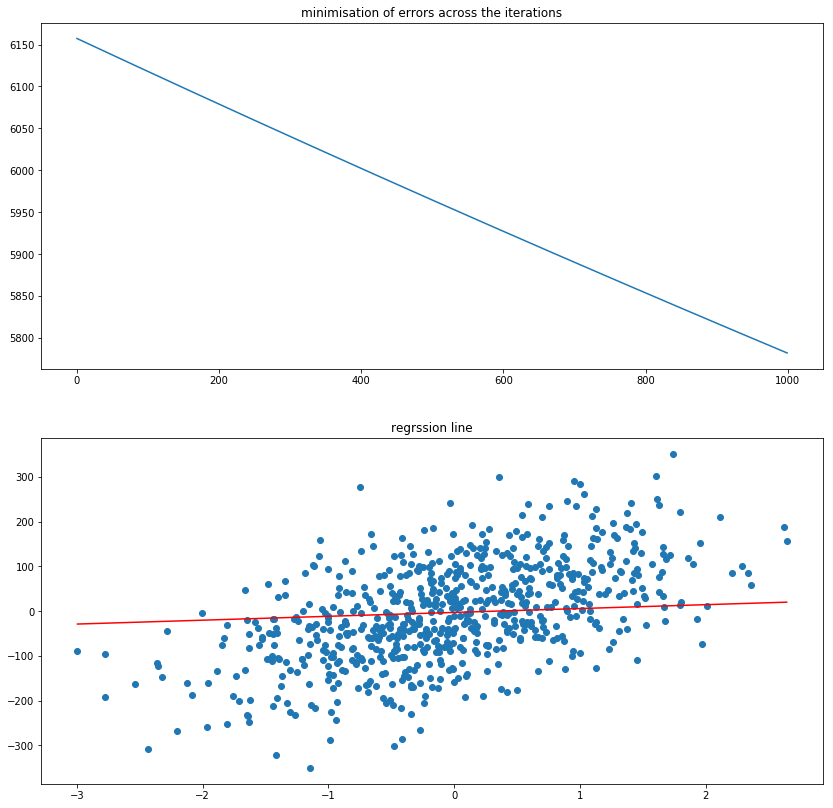

Mean Squared Error= 11560.152297887777


In [60]:
l.results()

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
plt.rcParams['figure.figsize'] = (5.0, 5.0

class LassoLinearRegression:
       def __init__(self,X_data,Y_data,l,l1,iterations): #initialize all parameters
           self.X=X_data
           self.Y=Y_data
           #weight and bias
           self.m=np.random.randn(X_data.shape[0])
           self.c=0
           self.L=l #learning rate
           self.l1=l1 #regularization parameter
           self.iter=iterations #num of iterations
           self.n=float(len(X_data))  #size of data
       
       def cost(self,pred_y): #cost function
           cost=np.sum(np.square(self.Y-pred_y))/(2*self.n) + self.l1*np.sum(self.m)
           return(cost)
       
       def fit(self):
           self.history=np.zeros(self.iter)
           pred_y=np.zeros((self.Y.shape))
           for j in range(self.iter):
               for i in range(0,len(self.X)):
                       pred_y[i]=self.m[i]*self.X[i]+self.c
                       if self.m[i]>0:
                           Dm= (-2/self.n)*(self.X[i]*(self.Y[i]-pred_y[i]))-self.l1 
                       else:
                           Dm= (-2/self.n)*(self.X[i]*(self.Y[i]-pred_y[i]))+self.l1


                       Dc= (-2/self.n)*(self.Y[i]-pred_y[i])
                       #update
                       self.m[i]=self.m[i]-Dm*self.L
                       self.c=self.c-Dc*self.L
               self.history[j]=self.cost(pred_y)
           self.mse=self.MSE(self.Y,pred_y)

             
      
       def MSE(self,pred_y,Y):
           errors=Y-pred_y #error is the difference between actual and predicted value
           mse=np.sum(np.square(errors))/self.n #mean of sum of square of erros
           return mse
       
       def results(self):
           fig=plt.figure(figsize=(14,14))
           a1=fig.add_subplot(211)

           plt.title('minimisation of errors across the iterations')
           a1.plot(self.history)


           #making predictions
           a2=fig.add_subplot(212)
           final_y=self.m*self.X +self.c 
           plt.scatter(self.X,self.Y)
           plt.title('regrssion line')
           a2.plot([min(self.X),max(self.X)],[min(final_y),max(final_y)],color='red') #plotting the red line 
           
           plt.show()
           
           print ('Mean Squared Error=',self.mse)

In [64]:
l=LassoLinearRegression(X_1[:,0],y_1,0.005,0.001,100)

In [65]:
l.fit()

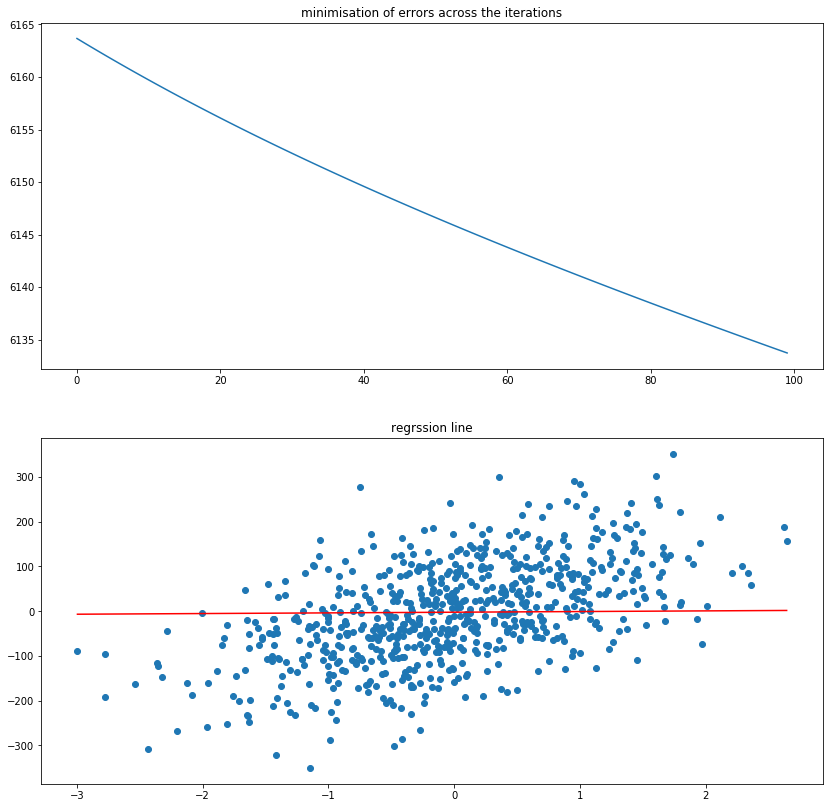

Mean Squared Error= 12267.440219691098


In [66]:
l.results()

## 3(d) 

In [93]:
n_features = 4
X = []
for i in range(n_features):
  X_i = scipy.stats.norm.rvs(0, 1, 100)
  X.append(X_i)
#print(X)
a1 = (np.exp(1 + (0.5 * X[0]) + (0.4 * X[1]) + (0.3 * X[2]) + (0.5 * X[3]))/(1 + np.exp(1 + (0.5 * X[0]) + (0.4 * X[1]) + (0.3 * X[2]) + (0.5 * X[3]))))
#print(a1)
y1 = []
for i in a1:
  if (i>=0.5):
    y1.append(1)
  else:
    y1.append(0)
#print(y1)
data_lr = {'X0': X[0],'X1':X[1],'X2':X[2],'X3':X[3],'Y': y1 }
df1 = pd.DataFrame(data_lr)
print(df1.head())
print(df1.tail())
print(df1.info())
print(df1.describe())

         X0        X1        X2        X3  Y
0  0.059367 -1.063328 -1.854960 -1.247298  0
1  0.112528  0.391182  0.482820  0.128314  1
2  0.172153 -0.074786 -0.237415  0.447886  1
3  0.232374 -0.999361 -0.223485 -0.697544  1
4  1.007139  0.344403 -0.792812  0.165488  1
          X0        X1        X2        X3  Y
95  1.829893 -0.226672 -0.229494 -0.995239  1
96  1.418651 -0.243316 -1.048777  3.211847  1
97 -0.977628 -0.958662  0.169538 -0.166101  1
98 -0.419567 -0.359826 -0.482387  1.776636  1
99  0.429714 -0.178670 -0.283051 -0.334089  1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
X0    100 non-null float64
X1    100 non-null float64
X2    100 non-null float64
X3    100 non-null float64
Y     100 non-null int64
dtypes: float64(4), int64(1)
memory usage: 4.0 KB
None
               X0          X1          X2          X3           Y
count  100.000000  100.000000  100.000000  100.000000  100.000000
mean    -0.039096   -0.099815  

## Logistic regression using L1 regularization

In [94]:
X1 = df1.iloc[:,0:4].values
y1 = df1.iloc[:,4].values
lam = 0.1
def sigmoid(Z):
  return 1 /(1+np.exp(-Z))

def loss(y1,y_hat):
  return -np.mean(y1*np.log(y_hat) + (1-y1)*(np.log(1-y_hat))) + (lam * (np.sum(W)))

W = np.zeros((4,1))
b = np.zeros((1,1))

m = len(y1)
lr = 0.001
for epoch in range(1000):
  Z = np.matmul(X1,W)+b
  A = sigmoid(Z)
  logistic_loss = loss(y1,A)
  dz = A - y1
  dw = 1/m * np.matmul(X1.T,dz) + lam
  db = np.sum(dz)

  W = W - lr*dw
  b = b - lr*db

  if epoch % 100 == 0:
    print(logistic_loss)


0.6931471805599453
-0.03170038905757144
-0.42613523340980214
-0.8167422097112528
-1.2035435655141136
-1.5865627059597123
-1.9658241641106016
-2.341353569384919
-2.713177614078256
-3.0813240179813524


## Logistic regression using L2 regularization

In [95]:
X1 = df1.iloc[:,0:4].values
y1 = df1.iloc[:,4].values
lam = 0.1
def sigmoid(Z):
  return 1 /(1+np.exp(-Z))

def loss(y1,y_hat):
  return -np.mean(y1*np.log(y_hat) + (1-y1)*(np.log(1-y_hat))) + (lam * (np.sum(np.square(W))))

W = np.zeros((4,1))
b = np.zeros((1,1))

m = len(y1)
lr = 0.001
for epoch in range(1000):
  Z = np.matmul(X1,W)+b
  A = sigmoid(Z)
  logistic_loss = loss(y1,A)
  dz = A - y1
  dw = 1/m * np.matmul(X1.T,dz) + lam * W
  db = np.sum(dz)

  W = W - lr*dw
  b = b - lr*db

  if epoch % 100 == 0:
    print(logistic_loss)

0.6931471805599453
0.36692403589064865
0.3673042116422372
0.36804463347925365
0.3691252641642231
0.37052689064933414
0.37223109439541285
0.3742202227159622
0.3764773611056232
0.37898630651461396


## 3(e)

In [83]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

In [84]:
clf = K_Means()
clf.fit(X3)

In [86]:
correct = 0
for i in range(len(X3)):
    predict_me = np.array(X3[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction == y3[i]:
        correct += 1
print(correct/len(X3))
print()

0.33
